<h1 style='color: green; font-size: 36px; font-weight: bold;'>Regressão Linear - Transformando os dados</h1>

# <font color='red' style='font-size: 30px;'>1.2 Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pandas

https://pandas.pydata.org/

In [185]:
import pandas as pd

## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>O mercado imobiliário vem sendo objeto de diversos estudos e pesquisas nos últimos tempos. A crise financeira que afeta a economia tem afetado significativamente os investimentos e ganhos advindos deste setor. Este cenário incentiva o aumento do interesse por estudos de previsão de demanda baseados em características deste mercado, dos imóveis e do entorno destes imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto o objetivo principal do nosso projeto é desenvolver um sistema de avaliação imobiliária utilizando a metodologia de regressões lineares que é uma das técnicas de machine learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nosso *dataset* é uma amostra aleatória de tamanho 5000 de imóveis disponíveis para venda no município do Rio de Janeiro.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (R$) de oferta do imóvel</li>
    <li><b>Area</b> - Área do imóvel em m²</li>
    <li><b>Dist_Praia</b> - Distância do imóvel até a praia (km) (em linha reta)</li>
    <li><b>Dist_Farmacia</b> - Distância do imóvel até a farmácia mais próxima (km) (em linha reta)</li>
</ul>

## Leitura dos dados

In [186]:
dados = pd.read_csv('../Dados/dataset.csv', sep=';')

## Visualizar os dados

In [187]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


## Verificando o tamanho do dataset

In [188]:
dados.shape

(5000, 4)

# <font color='red' style='font-size: 30px;'>1.3 Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [189]:
# Aqui iremos tratar os dados a partir de um trabalho de outliers já realizado
# portanto valores como o máximo de 25M pode ser levado em consideração 
# sabemos q há imóveis no RJ nesse valor e nessas metragens (2.000m2).
dados.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [190]:
# Positiva significa q quando um desce o outro desce junto
# Negativa quer dizer que quando um sobe o outro desce
# Aqui a nossa variável dependente é o Valor (será nosso Y 
dados.corr().round(4)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Praia,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


# <font color='red' style='font-size: 30px;'>2.1 Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

In [191]:
import seaborn as sns

## Configurações de formatação dos gráficos

In [192]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('Accent')
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

## Box plot da variável *dependente* (y)

<img width='700px' src='../Dados/img/Box-Plot.png'>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

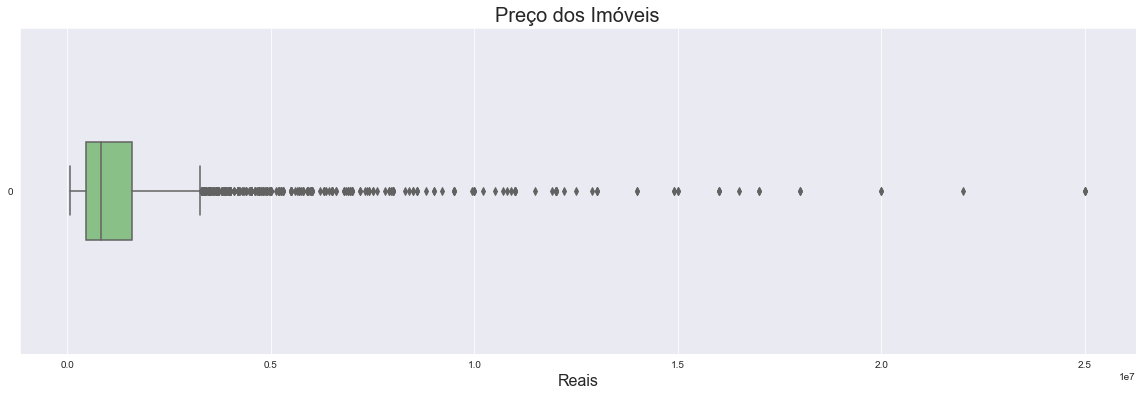

In [193]:
ax = sns.boxplot(data=dados['Valor'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>2.2 Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

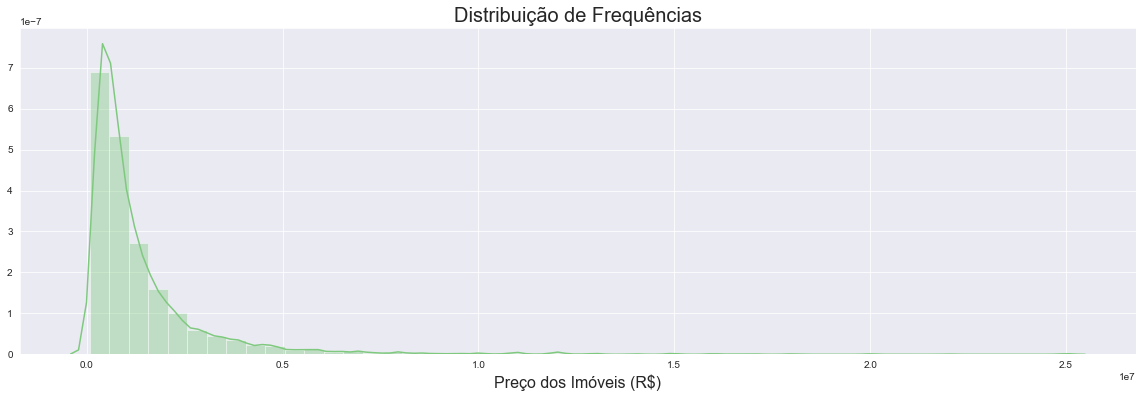

In [194]:
ax = sns.distplot(dados['Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax

* O ideal seria que a distribuição fosse mais próxima da Simétrica para uso em Regressão Linear. Porém iremos usar métodos que irão levar nosso gráfico para mais próximo da simetria desejada.

<img width='800px' src='../Dados/img/Box-Plot II.png'>

# <font color='red' style='font-size: 30px;'>2.3 Dispersão Entre as Variáveis</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

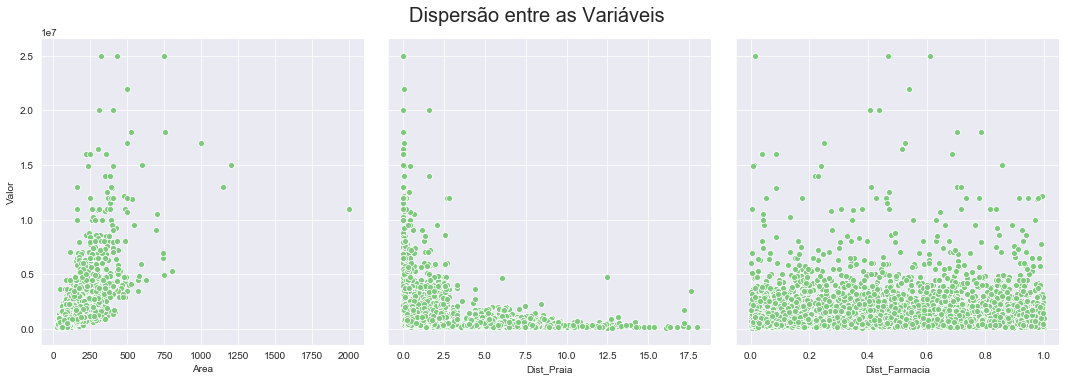

In [195]:
# Vamos plotar as variárias em relação ao Y
ax = sns.pairplot(dados, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

* Já que não conseguimos identificar uma reta com esses gráficos, vamos traçar uma reta de regressão

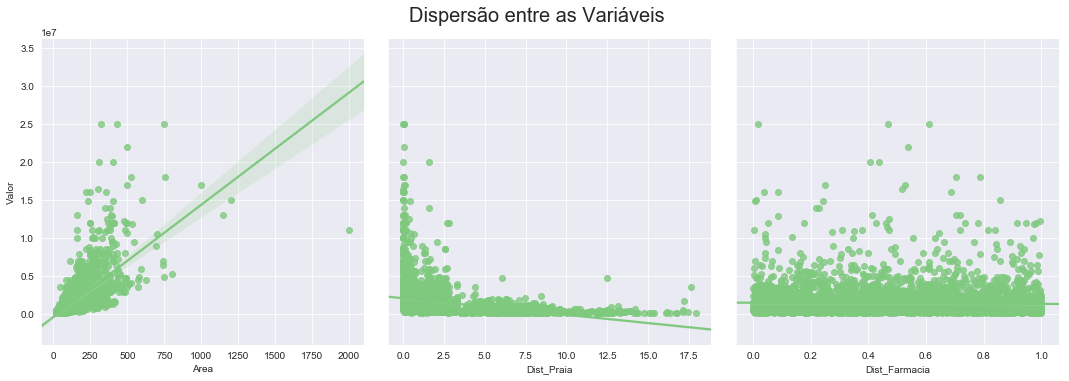

In [196]:
ax = sns.pairplot(dados, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], kind='reg', height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

* Com os modelos acima fica difícil identificar um comportamento linear e por isso usaremos outro método para transformar esses dados em algo mais linear para podermos estimar uma regressão linear no futuro

# <font color='red' style='font-size: 30px;'>3.1 Transformando os Dados</font>
<hr style='border: 2px solid red;'>

## Distribuição Normal
<hr>

### Por quê? 
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Testes paramétricos assumem que os dados amostrais foram coletados de uma população com distribuição de probabilidade conhecida. Boa parte dos testes estatísticos assumem que os dados seguem uma distribuição normal (t de Student, intervalos de confiança etc.).</p>



<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

## Importando biblioteca numpy

In [197]:
import numpy as np

## Aplicando a transformação logarítmica aos dados do *dataset*

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

* Iremos transformar os dados para conseguir uma distribuição mais próxima da Normal (ou simétrica) para termos melhores resultados no final do estudo. (ver "Distribuição de frequências da variável *dependente* (y)")

In [198]:
# quando usamos o valor 0 (no eixo x) não teremos valores no eixo y pois estará em cima do eixo.
# vou deixar o erro para termos referencia no futuro
np.log(0)

/Users/sjwseo/Dev/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


-inf

In [199]:
# quando colocamos o valor 1 aparecerá o primeiro valor do eixo; que é o zero
np.log(1)

0.0

In [200]:
# foi acrescentado o valor +1 para Dist_Praia e Dist_Farmacia pois os valores iniciais deles estão em zero. (ver em estatística descritiva)
# se deixarmos o valor zero (sem o +1) não teremos como incluir essas variaveis no nosso estudo
dados['log_Valor'] = np.log(dados['Valor'])
dados['log_Area'] = np.log(dados['Area'])
dados['log_Dist_Praia'] = np.log(dados['Dist_Praia'] + 1)
dados['log_Dist_Farmacia'] = np.log(dados['Dist_Farmacia'] + 1)

In [201]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


## Distribuição de frequências da variável *dependente transformada* (y)

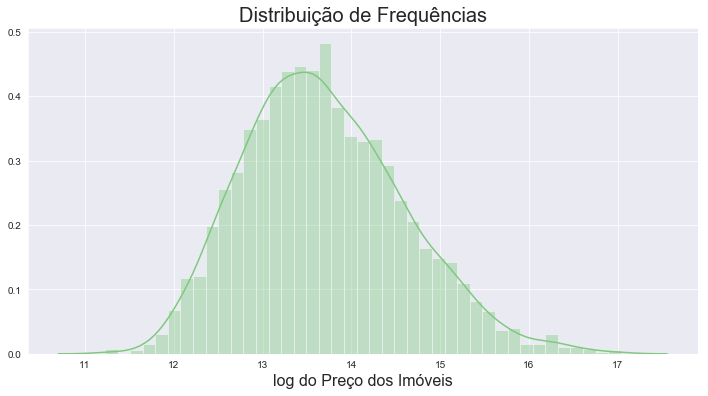

In [202]:
ax =  sns.distplot(dados['log_Valor'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Preço dos Imóveis', fontsize=16)
ax

* Desta forma podemos notar que aquele efeito de assimetria à direita (ver Distribuição de frequências da variável *dependente* (y)) está "corrigida" e temos uma simetria no gráfico

# <font color='red' style='font-size: 30px;'>3.2 Verificando Relação Linear</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis transformadas do dataset

* Agora vamos verificar como as variáveis explicativas estão se comportando referente a variável y

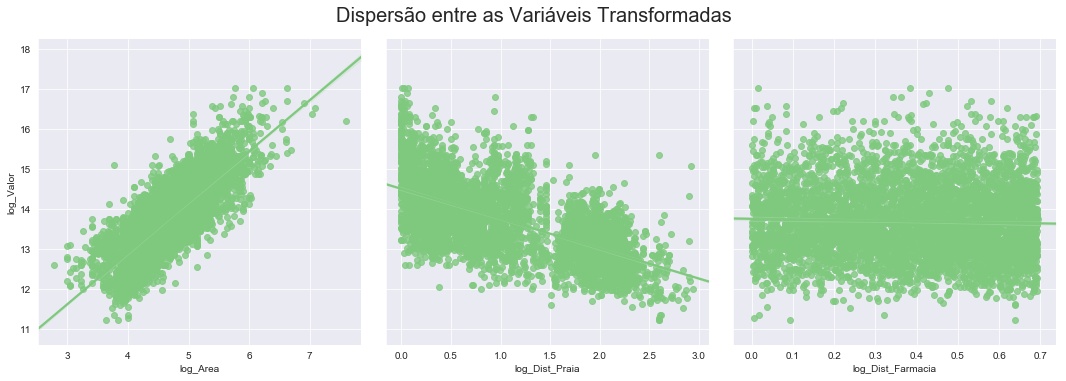

In [203]:
ax = sns.pairplot(dados, y_vars='log_Valor', x_vars=['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'], kind='reg', height=5)
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
ax

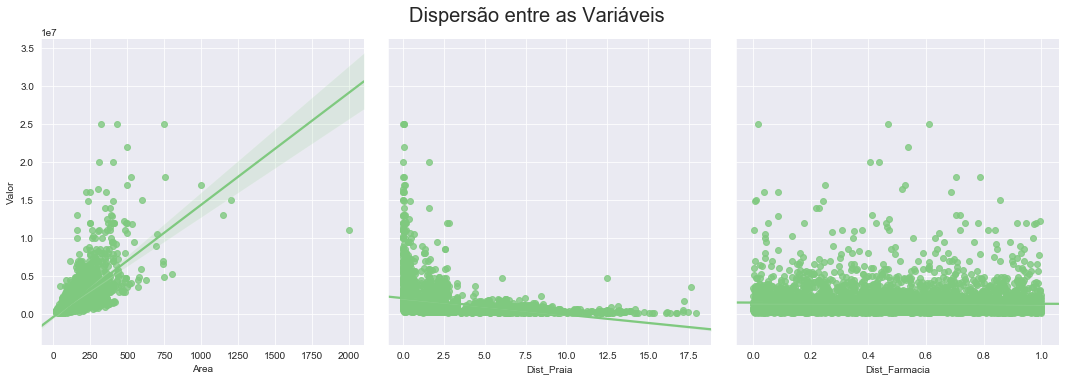

In [204]:
# Abaixo as variaveis sem serem transformadas, apenas para efeito de comparação
ax = sns.pairplot(dados, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], kind='reg', height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

* Dá pra perceber que a variavel log_area e log_dist_praia tem uma reta bem determinada tanto em crescimento ou em queda. Agora a log_dist_farmacia se mantém bem estável sem variação, de acordo com a variavel valor. Provavelmente ele tem uma correlação muito baixo com a variavel dependente e pode ser q seja descartada para os testes a seguir.

# <font color='red' style='font-size: 30px;'>4.1 Criando os *Datasets* de Treino e Teste</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [205]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Preço dos Imóveis (y)

In [206]:
y = dados['log_Valor']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [207]:
X = dados[['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia']]

## Criando os datasets de treino e de teste

In [208]:
# estaremos usando apenas 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)
X_train.head(20)

,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,5.945421,0.000000,0.382273
912,3.135494,0.972865,0.605015
3042,4.317488,1.794961,0.486594
141,3.401197,0.310455,0.599609
3854,5.676754,0.032193,0.101903
4561,5.438079,1.182793,0.628547
4229,4.127134,1.632077,0.176840
718,4.219508,1.838462,0.174500
3895,4.158883,0.536594,0.346678
4726,4.330733,2.164887,0.348602


# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



<img width='800px' src='../Dados/img/Log-linear.png'>

## Importando a biblioteca statsmodels

https://www.statsmodels.org/stable/index.html

In [209]:
import statsmodels.api as sm 

## Estimando o modelo com statsmodels

In [210]:
X_train_com_constante = sm.add_constant(X_train)
X_train_com_constante.head(20)

/Users/sjwseo/Dev/Anaconda/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903
4561,1.0,5.438079,1.182793,0.628547
4229,1.0,4.127134,1.632077,0.176840
718,1.0,4.219508,1.838462,0.174500
3895,1.0,4.158883,0.536594,0.346678
4726,1.0,4.330733,2.164887,0.348602


In [211]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

# <font color='red' style='font-size: 30px;'>4.2 Avaliando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Avaliando as estatísticas de teste do modelo

In [212]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Wed, 28 Aug 2019   Prob (F-statistic):               0.00
Time:                        05:16:40   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.06

Aqui, conseguimos ver também o R-squared que é o R2 em que alcançamos 80% o R2 (Adj. R-squared) ajustado também é uma estatística interessante que é basicamente o que considera os graus de liberdade, ou seja, se colocarmos muitas variáveis ele vai diminuindo seu grau de liberdade.

O R2 está sempre subindo ou se mantendo o mesmo, ele nunca cai, o RD ajustável tem por característica,conforme adicionamos muitas propriedades, ou seja, perdermos o grau de liberdade e ganhamos em explicação. Ele começa a cair, este é seu indicativo.

O teste F (F-statistic) é um teste de importante - todos estes são testes de hipótese - que testa a significância de todos os parâmetros do modelo em conjunto. O teste que ele faz é se você aceita a hipótese ou não desses itens conjuntamente serem iguais a zero, ou seja, regressão de sentido. Como verificar isso de forma simples?

Tínhamos a estatística de Teste (F-statistic) 5495 e a Aceitação (Prob (F-statisc)) de 0.00. Valores acima de 0.05, rejeitamos o modelo, ou seja, ele não é estatisticamente significativo, segundo essa estatística eles são praticamente zero, a regressão não é boa. Ao nível de 95% em Prob F Statistic você teria que ter uma estatística menor ou igual a0.05, maior que isso nosso modelo precisaria ser revisto.

# <font color='red' style='font-size: 30px;'>4.3 Modificando o Modelo e Avaliando Novamente o Ajuste</font>
<hr style='border: 2px solid red;'>

## Criando um novo conjunto de variáveis explicativas (X)

In [213]:
X = dados[['log_Area', 'log_Dist_Praia']]

## Criando os datasets de treino e de teste

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)
X_train.head(20)

,log_Area,log_Dist_Praia
2661,5.945421,0.000000
912,3.135494,0.972865
3042,4.317488,1.794961
141,3.401197,0.310455
3854,5.676754,0.032193
4561,5.438079,1.182793
4229,4.127134,1.632077
718,4.219508,1.838462
3895,4.158883,0.536594
4726,4.330733,2.164887


## Estimando o modelo com o statsmodels

In [215]:
X_train_com_constante = sm.add_constant(X_train)

In [216]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

## Avaliando as estatísticas de teste do novo modelo

In [217]:
# sabendo que dist_praia não faz mais parte do modelo entendemos que não precisa gastar dinheiro para calcular essa distancia, pois ela não afeta a variável dependente log_Valor.
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Wed, 28 Aug 2019   Prob (F-statistic):               0.00
Time:                        05:16:40   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.

Reparem que nosso R2 (R-squared) ficou estacionado o que mostra que ela é bastante ruim porque como anteriormente dito, se é colocado informação e e ele está sempre aumenta o valor do R2 e nesse caso vemos que o R2 travou, logo, continua com R2 bom. Analisando nossa estatística de teste F também passou - aqui os valores de F sendo menor ou igual a 0,05 foram deixados como cortesia

Podemos assumir que esse modelo está bem estimado.

# <font color='red' style='font-size: 30px;'>5.1 Estimando o Modelo com os Dados de Treino</font>
<hr style='border: 2px solid red;'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [218]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

## Instanciando a classe *LinearRegression()*

In [219]:
modelo =  LinearRegression() 

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [220]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [221]:
# este coeficiente é referente ao modelo de treino
print('R² = {}'.format(modelo.score(X_train, y_train).round(3)))

R² = 0.805


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [222]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [223]:
# este coeficiente é referente ao modelo de teste. Como podemos ver o resultado é bem próximo do modelo de treino
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(3))

R² = 0.79


# <font color='red' style='font-size: 30px;'>5.2 Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [224]:
entrada = X_test[0:1]
entrada

,log_Area,log_Dist_Praia
1006,5.273,1.282769


## Gerando previsão pontual

In [225]:
# Este valor não é o valor real pois está em log. Logo abaixo iremos transformá-lo em reais
modelo.predict(entrada)[0].round(2)

14.28

## Invertendo a transformação para obter a estimativa em R$

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

In [226]:
valor_em_reais = np.exp(modelo.predict(entrada)[0])

In [227]:
print('R$ {0:.2f}'.format(valor_em_reais))

R$ 1598889.78


## Criando um simulador simples

In [228]:
# Os valores da Area está em m2 e o dist_Praia está em Km
# .2f vai deixar apenas 2 casas decimais
Area = 250
Dist_Praia = 1
entrada = [[np.log(Area), np.log(Dist_Praia + 1)]]

print('R$ {0:.2f}'.format(np.exp(modelo.predict(entrada)[0])))

R$ 2777292.84


# <font color='red' style='font-size: 30px;'>5.3 Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Preço do Imóveis) tendo todas as variáveis explicativas excluídas do modelo. No caso do modelo log-linear este coeficiente deve ser transformado com o uso da função exponencial para ser apresentado em R$.</p>

In [229]:
model = modelo.intercept_
model

9.334916409800334

In [230]:
model_em_reais = np.exp(modelo.intercept_)

In [231]:
print("R$ {0:.2f}".format(model_em_reais))

R$ 11326.68


## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$ e $\beta_3$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Um aspecto interessante do modelo log-linear, que o tornou muito utilizado nos trabalhos aplicados, é que os coeficientes angulares $\beta_2$ e $\beta_3$ medem as elasticidades de Y em relação a $X_2$ e $X_3$, isto é, a variação percentual de Y correspondente a uma dada variação percentual (pequena) em $X_2$ e $X_3$.</p>

In [232]:
# através deste comando podemos ter os dois coeficientes b2 e b3
modelo.coef_

array([ 1.05807818, -0.49061226])

## Confirmando a ordem das variáveis explicativas no DataFrame

In [233]:
X.columns

Index(['log_Area', 'log_Dist_Praia'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [234]:
index = ['Intercepto','log Área', 'log Distância até a Praia']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [235]:
# o round() foi usado apenas para facilitar a explicação.
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros']).round(2)

,Parâmetros
Intercepto,9.33
log Área,1.06
log Distância até a Praia,-0.49


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=0$) o efeito médio no Preço dos Imóveis seria de <b>R$ 11.326,68</b> (exp[9.334916]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Mantendo-se o valor de $X_3$ (Distância até a Praia) constante, um acréscimo de 1% na Área de um imóvel gera, em média, um acréscimo de <b>1.06%</b> no Preço do Imóvel.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distância até a Praia (km)</b> → Mantendo-se o valor de $X_2$ (Área) constante, um acréscimo de 1% na Distância de um imóvel até a praia gera, em média, um decréscimo de <b>0.49%</b> no Preço do Imóvel.
</p>

# <font color='red' style='font-size: 30px;'>5.4 Análises Gráficas dos Resultados do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [236]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

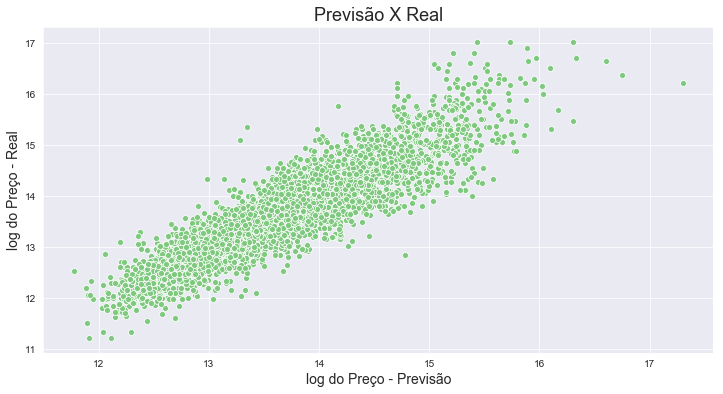

In [237]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

## Obtendo os resíduos

In [238]:
residuo = y_train - y_previsto_train

## Plotando a distribuição de frequências dos resíduos

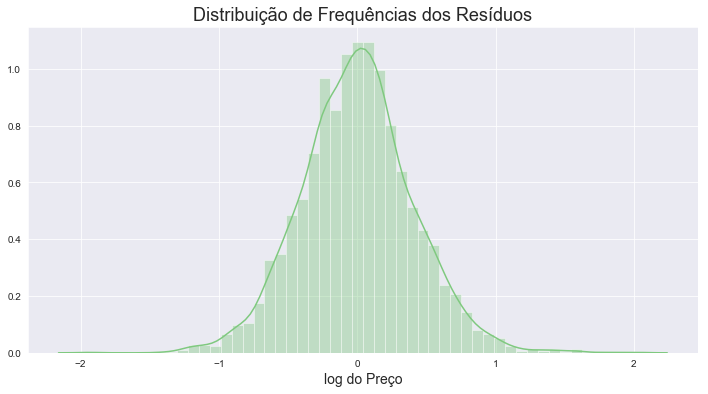

In [239]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço', fontsize=14)
ax

É importante frisar que este se trata de um estudo, e não de um modelo a ser usado comercialmente, que precisaria de mais variáveis e elementos para operar de maneira funcional. Contudo, conseguimos antever qual seria o comportamento adequado para que um modelo estimativo nos fornecesse informações seguras, e para este fim, nosso projeto cabe perfeitamente.

